In [2]:
import meow as mw
import numpy as np
import matplotlib.pyplot as plt

## Preparation
let's perform a mode simulation

In [3]:
length = 10.0
box = mw.Box(
    x_min=-0.22,
    x_max=0.22,
    y_min=0,
    y_max=0.22,
    z_min=0.0,
    z_max=length,
)

In [4]:
struct = mw.Structure(material=mw.silicon, geometry=box)

In [5]:
env = mw.Environment(wl=1.55, T=25.0)

In [6]:
cells = mw.create_cells(
    structures=[struct],
    mesh=mw.Mesh2d(
        x = np.linspace(-1, 1, 101),
        y = np.linspace(-1, 1, 101),
    ),
    Ls = [length/3]*3
)
css = [mw.CrossSection(cell=cell, env=env) for cell in cells]

In [7]:
modes = [mw.compute_modes(cs, num_modes=2) for cs in css]

## Interface matrices
Here begins the interesting part.
Let`s try to calculate the S matrix.

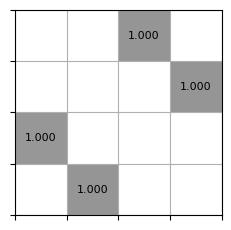

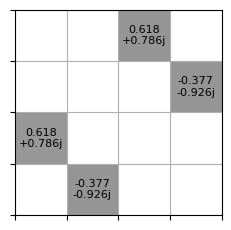

In [8]:
S, _ = mw.compute_s_matrix(modes)
mw.vis(np.abs(S))
mw.vis(S)
# mw.vis(S, angle=True)

The S-parameters are as we would expect: no reflection and full transmission in the qTE and qTM modes, which gain a different phase while propagating along the waveguide.

Let's change the mode of the center section by giving it an **additive phase**:

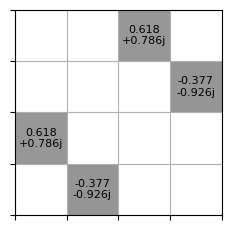

In [9]:
modes_ = modes.copy()
modes_[1] = [m*np.exp(0.2j) for m in modes_[1]]
S, _ = mw.compute_s_matrix(modes_, enforce_reciprocity=False)
mw.vis(S)
# mw.vis(S, angle=True)

As we can see the overall system matrix is unchanged, which is as expected, as there is no global well defined phase.
Note that this also means, that strictly speaking no phase zeroing is required.

We can see from the single interface matrices (below), that the phase is changed forth and back while traversing the inner section. Note that the interface matrices are not reciprocal in the typical sense. That is the intended behavior: The mode in section 0 is mapped to a phase shifted vesion of itself in section 1. Going back to the mode of section one requires inverting the applied phase shift. **Important:** this is different compared to a piece of waveguide, where the phase progresses forward irrespectable of the direction of propagation through the waveguide.

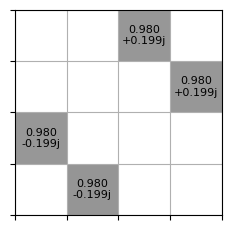

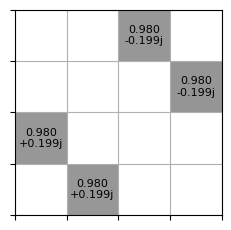

In [10]:
from meow.eme import compute_interface_s_matrix
for i in [0,1]:
    mw.vis(compute_interface_s_matrix(modes_[i], modes_[i+1])[0])

## Note:
when changing the phase of the mode at the input/output of the structure the phase of the S-parameters will change, as the "reference" changes. It is thus still a good idea to have a consistent definition of the zero phase. 

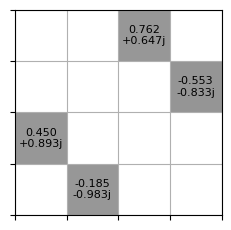

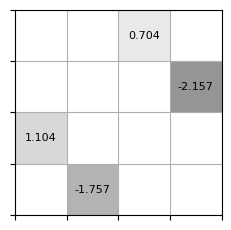

In [12]:
modes_ = modes.copy()
modes_[0] = [m*np.exp(0.2j) for m in modes_[0]]
S, _ = mw.compute_s_matrix(modes_, enforce_reciprocity=False)
mw.vis(S)
mw.vis(S, angle=True)

## Additional Note
how that zero phase is defined is however irrelevant:

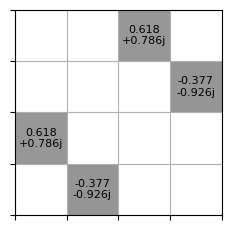

In [14]:
modes_ = modes.copy()
for i in [0,2]: 
    modes_[i] = [m*np.exp(0.2j) for m in modes_[i]]
S, _ = mw.compute_s_matrix(modes_, enforce_reciprocity=False)
mw.vis(S)